In [2]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Training News Headlines and Testing News Headlines (SVM) #


Model Trained on News Headlines
               precision    recall  f1-score   support

Not Clickbait       0.94      0.96      0.95      3183
    Clickbait       0.96      0.94      0.95      3217

     accuracy                           0.95      6400
    macro avg       0.95      0.95      0.95      6400
 weighted avg       0.95      0.95      0.95      6400



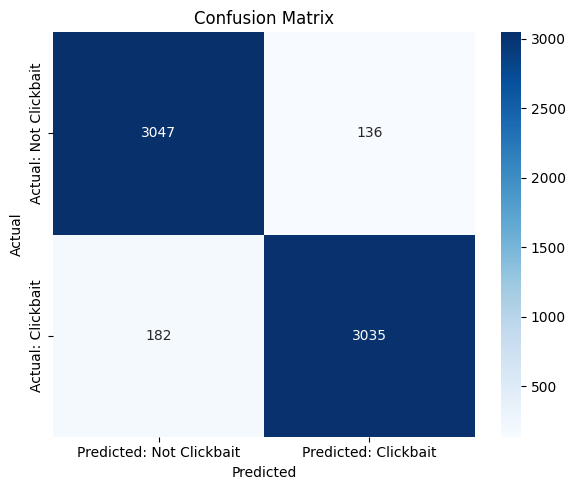

In [3]:
df = pd.read_csv('clickbait_data.csv')

# Shuffles the dataframe into random order
df = df.sample(frac=1, random_state=42).reset_index(drop=True) #(Line generated via ChatGPT) 

def preprocess(text):
    '''
    This function is used to process the data so it can be used 
    for vectorization. It converts the text into lowercase and 
    removes the punctuation.
    '''
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# preprocess the headlines for training and testing
df['processed'] = df['headline'].apply(preprocess)

# Converts text data into TF-IDF vectors
# Removes most common words "stop_words"
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000) #(Line generated via ChatGPT)

# Create our table of TF-IDF values
X = vectorizer.fit_transform(df['processed'])

# Target column to tell us which headline is clickbait or not
y = df['clickbait']

# Test Split 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Initialize model and train using our train data
model = LinearSVC()
model.fit(X_train, y_train)

# Preditct using our trained model
y_pred = model.predict(X_test)


# Visualize and display results
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm,
    index=["Actual: Not Clickbait", "Actual: Clickbait"],
    columns=["Predicted: Not Clickbait", "Predicted: Clickbait"]
)

print("\nModel Trained on News Headlines")
print(classification_report(
    y_test,
    y_pred,
    target_names=["Not Clickbait", "Clickbait"]
))

plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


# Testing Youtube Video Titles on News Headline Trained SVM #


Model Tested on YouTube Titles
               precision    recall  f1-score   support

Not Clickbait       0.67      0.49      0.57       100
    Clickbait       0.60      0.76      0.67       101

     accuracy                           0.63       201
    macro avg       0.64      0.63      0.62       201
 weighted avg       0.64      0.63      0.62       201



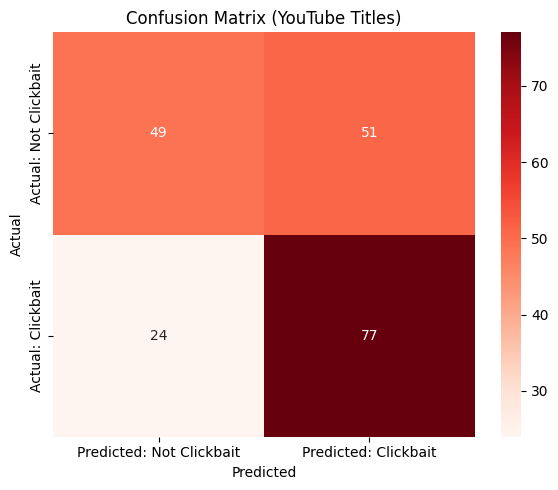

In [5]:
df2 = pd.read_csv('youtube_dataset.csv')

# Rename 'Video Title' column to headline for consistency
df2.rename(columns={'Video Title': 'headline'}, inplace=True)

# Shuffle data and preprocess
df2 = df2.sample(frac=1, random_state=42).reset_index(drop=True) #(Line generated via ChatGPT) 
df2['processed'] = df2['headline'].apply(preprocess)

# Convert titles into TF-IDF vectors (X) Label to verify correctness (Y)
X_youtube = vectorizer.transform(df2['processed'])
y_youtube = df2['isClickbait']

# Predict youtube data using trained model on news headlines
y_youtube_pred = model.predict(X_youtube)

# Visualize and display results
cm_youtube = confusion_matrix(y_youtube, y_youtube_pred)
cm_youtube_df = pd.DataFrame(
    cm_youtube,
    index=["Actual: Not Clickbait", "Actual: Clickbait"],
    columns=["Predicted: Not Clickbait", "Predicted: Clickbait"]
)

print("\nModel Tested on YouTube Titles")
print(classification_report(
    y_youtube,
    y_youtube_pred,
    target_names=["Not Clickbait", "Clickbait"]
))

plt.figure(figsize=(6, 5))
sns.heatmap(cm_youtube_df, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (YouTube Titles)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()